# Problem Statement
## The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

# Data Description

### 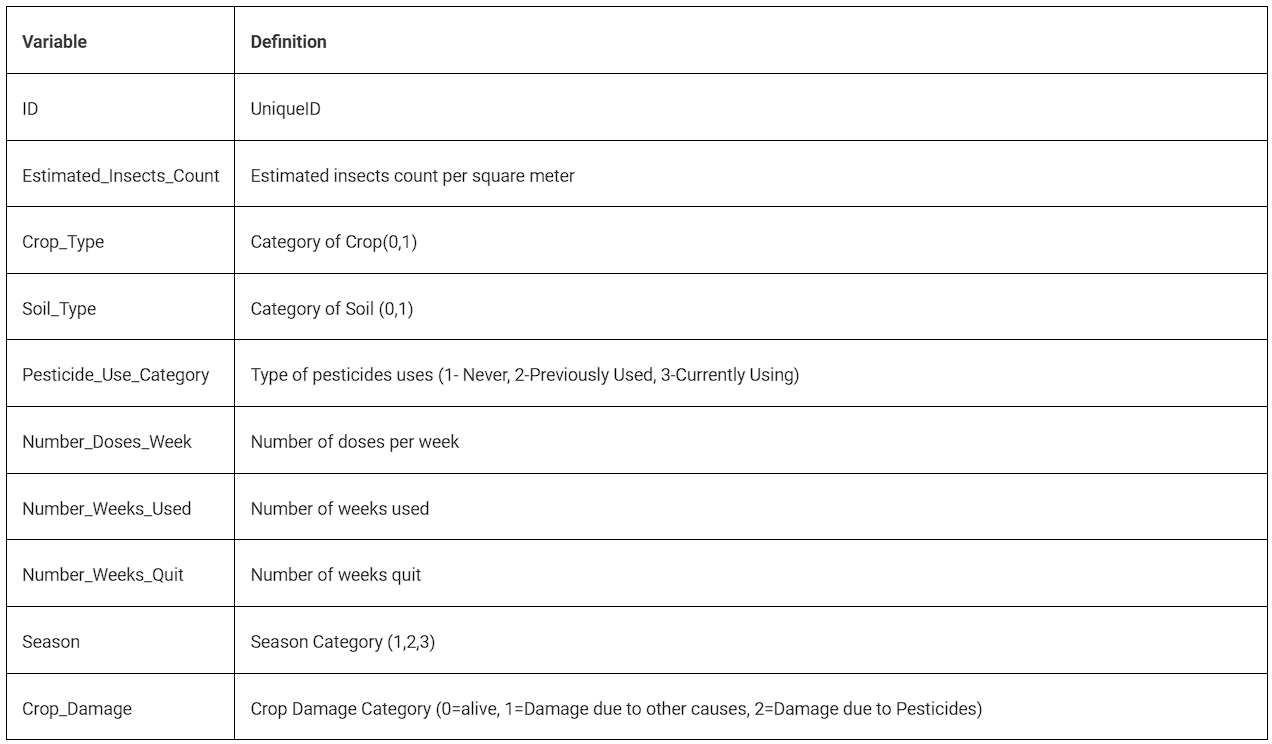

## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import io

In [3]:
%cd "Downloads"

C:\Users\zaida\Downloads


In [5]:
train = pd.read_csv("train_yaOffsB.csv")

In [6]:
test = pd.read_csv("test_pFkWwen.csv")

In [7]:
# This is a trainig dataset
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [8]:
# This is a testing dataset
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [13]:
print("Shape of training dataset = " ,np.shape(train))
print("Shape of testing dataset = " ,np.shape(test))

Shape of training dataset =  (88858, 10)
Shape of testing dataset =  (59310, 9)


In [14]:
# Training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [15]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [16]:
train.isna().sum()
# There are Nans in "Number_Weeks_Used"

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

## Exploring the Features

In [17]:
train.ID.value_counts()
# Every ID is unique, So there is no relation betweeen ID and My Target variable(Crop_Damage)

ID
F00000001    1
F00103956    1
F00103971    1
F00103969    1
F00103967    1
            ..
F00052031    1
F00052030    1
F00052028    1
F00052027    1
F00155945    1
Name: count, Length: 88858, dtype: int64

In [18]:
train.Estimated_Insects_Count.value_counts()

Estimated_Insects_Count
1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: count, Length: 71, dtype: int64

In [19]:
train.Crop_Type.value_counts()

Crop_Type
0    63589
1    25269
Name: count, dtype: int64

In [20]:
train.Soil_Type.value_counts()

Soil_Type
0    48124
1    40734
Name: count, dtype: int64

In [21]:
train.Pesticide_Use_Category.value_counts()
# 1- Never, 2-Previously Used, 3-Currently Using

Pesticide_Use_Category
2    63709
3    24312
1      837
Name: count, dtype: int64

In [22]:
train.Season.value_counts()

Season
2    44210
1    26902
3    17746
Name: count, dtype: int64

In [23]:
# target Variable
train.Crop_Damage.value_counts()
# 0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides

Crop_Damage
0    74238
1    12307
2     2313
Name: count, dtype: int64

## Missing Values

In [26]:
train.Number_Weeks_Used.isna().sum()

9000

In [27]:
train.Number_Weeks_Used.describe()

count    79858.000000
mean        28.623970
std         12.391881
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [ ]:
# Missing Values - Variable count less than dataframe row count
# Weather Mean & Median are close to one another . Mean gets distroted by outliers
# Median to be use if mean is distroted

In [30]:
# Median Imputation for Missing values
train["Number_Weeks_Used"] = train.Number_Weeks_Used.fillna(train.Number_Weeks_Used.median())

In [31]:
train.Number_Weeks_Used.isna().sum()

0

# EDA

<Axes: >

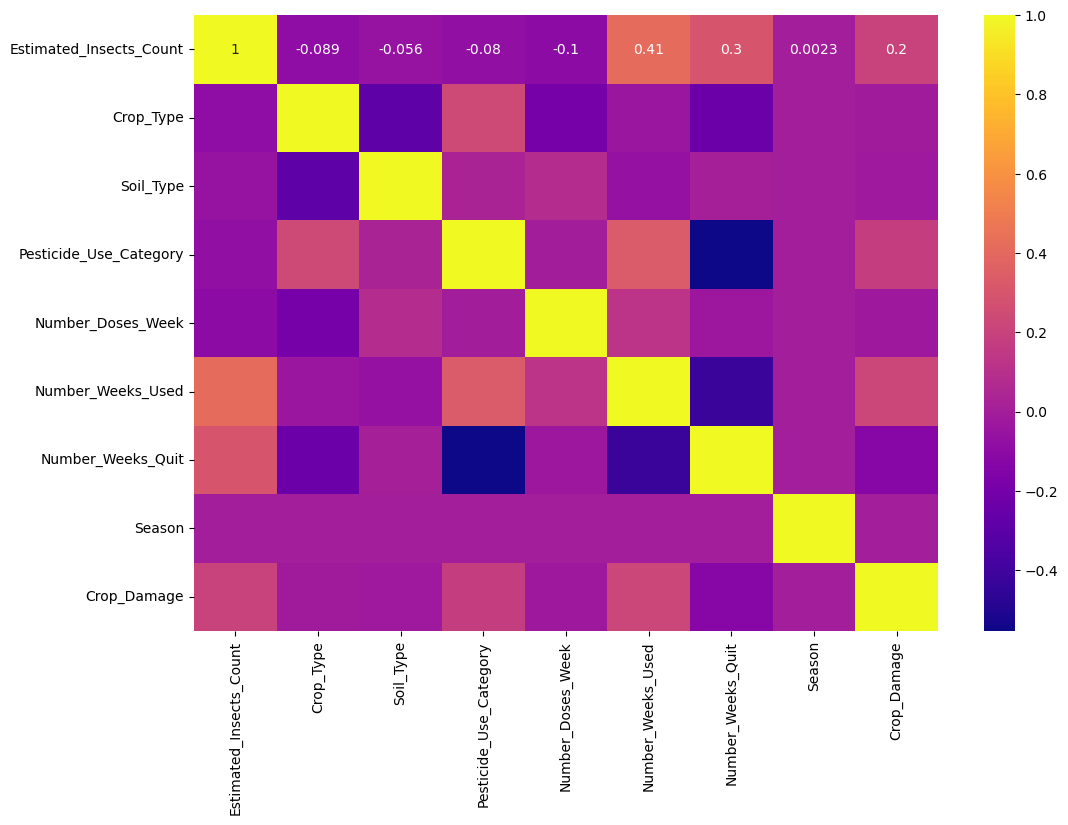

In [39]:
N = train.drop("ID",axis=1)
plt.figure(figsize=(12,8))
sns.heatmap(N.corr(),annot=True,cmap="plasma")

In [40]:
# Here Yellow is indicationg strong correlation and Blue is indiccating week correlation.
# There is no multicollinearity present.

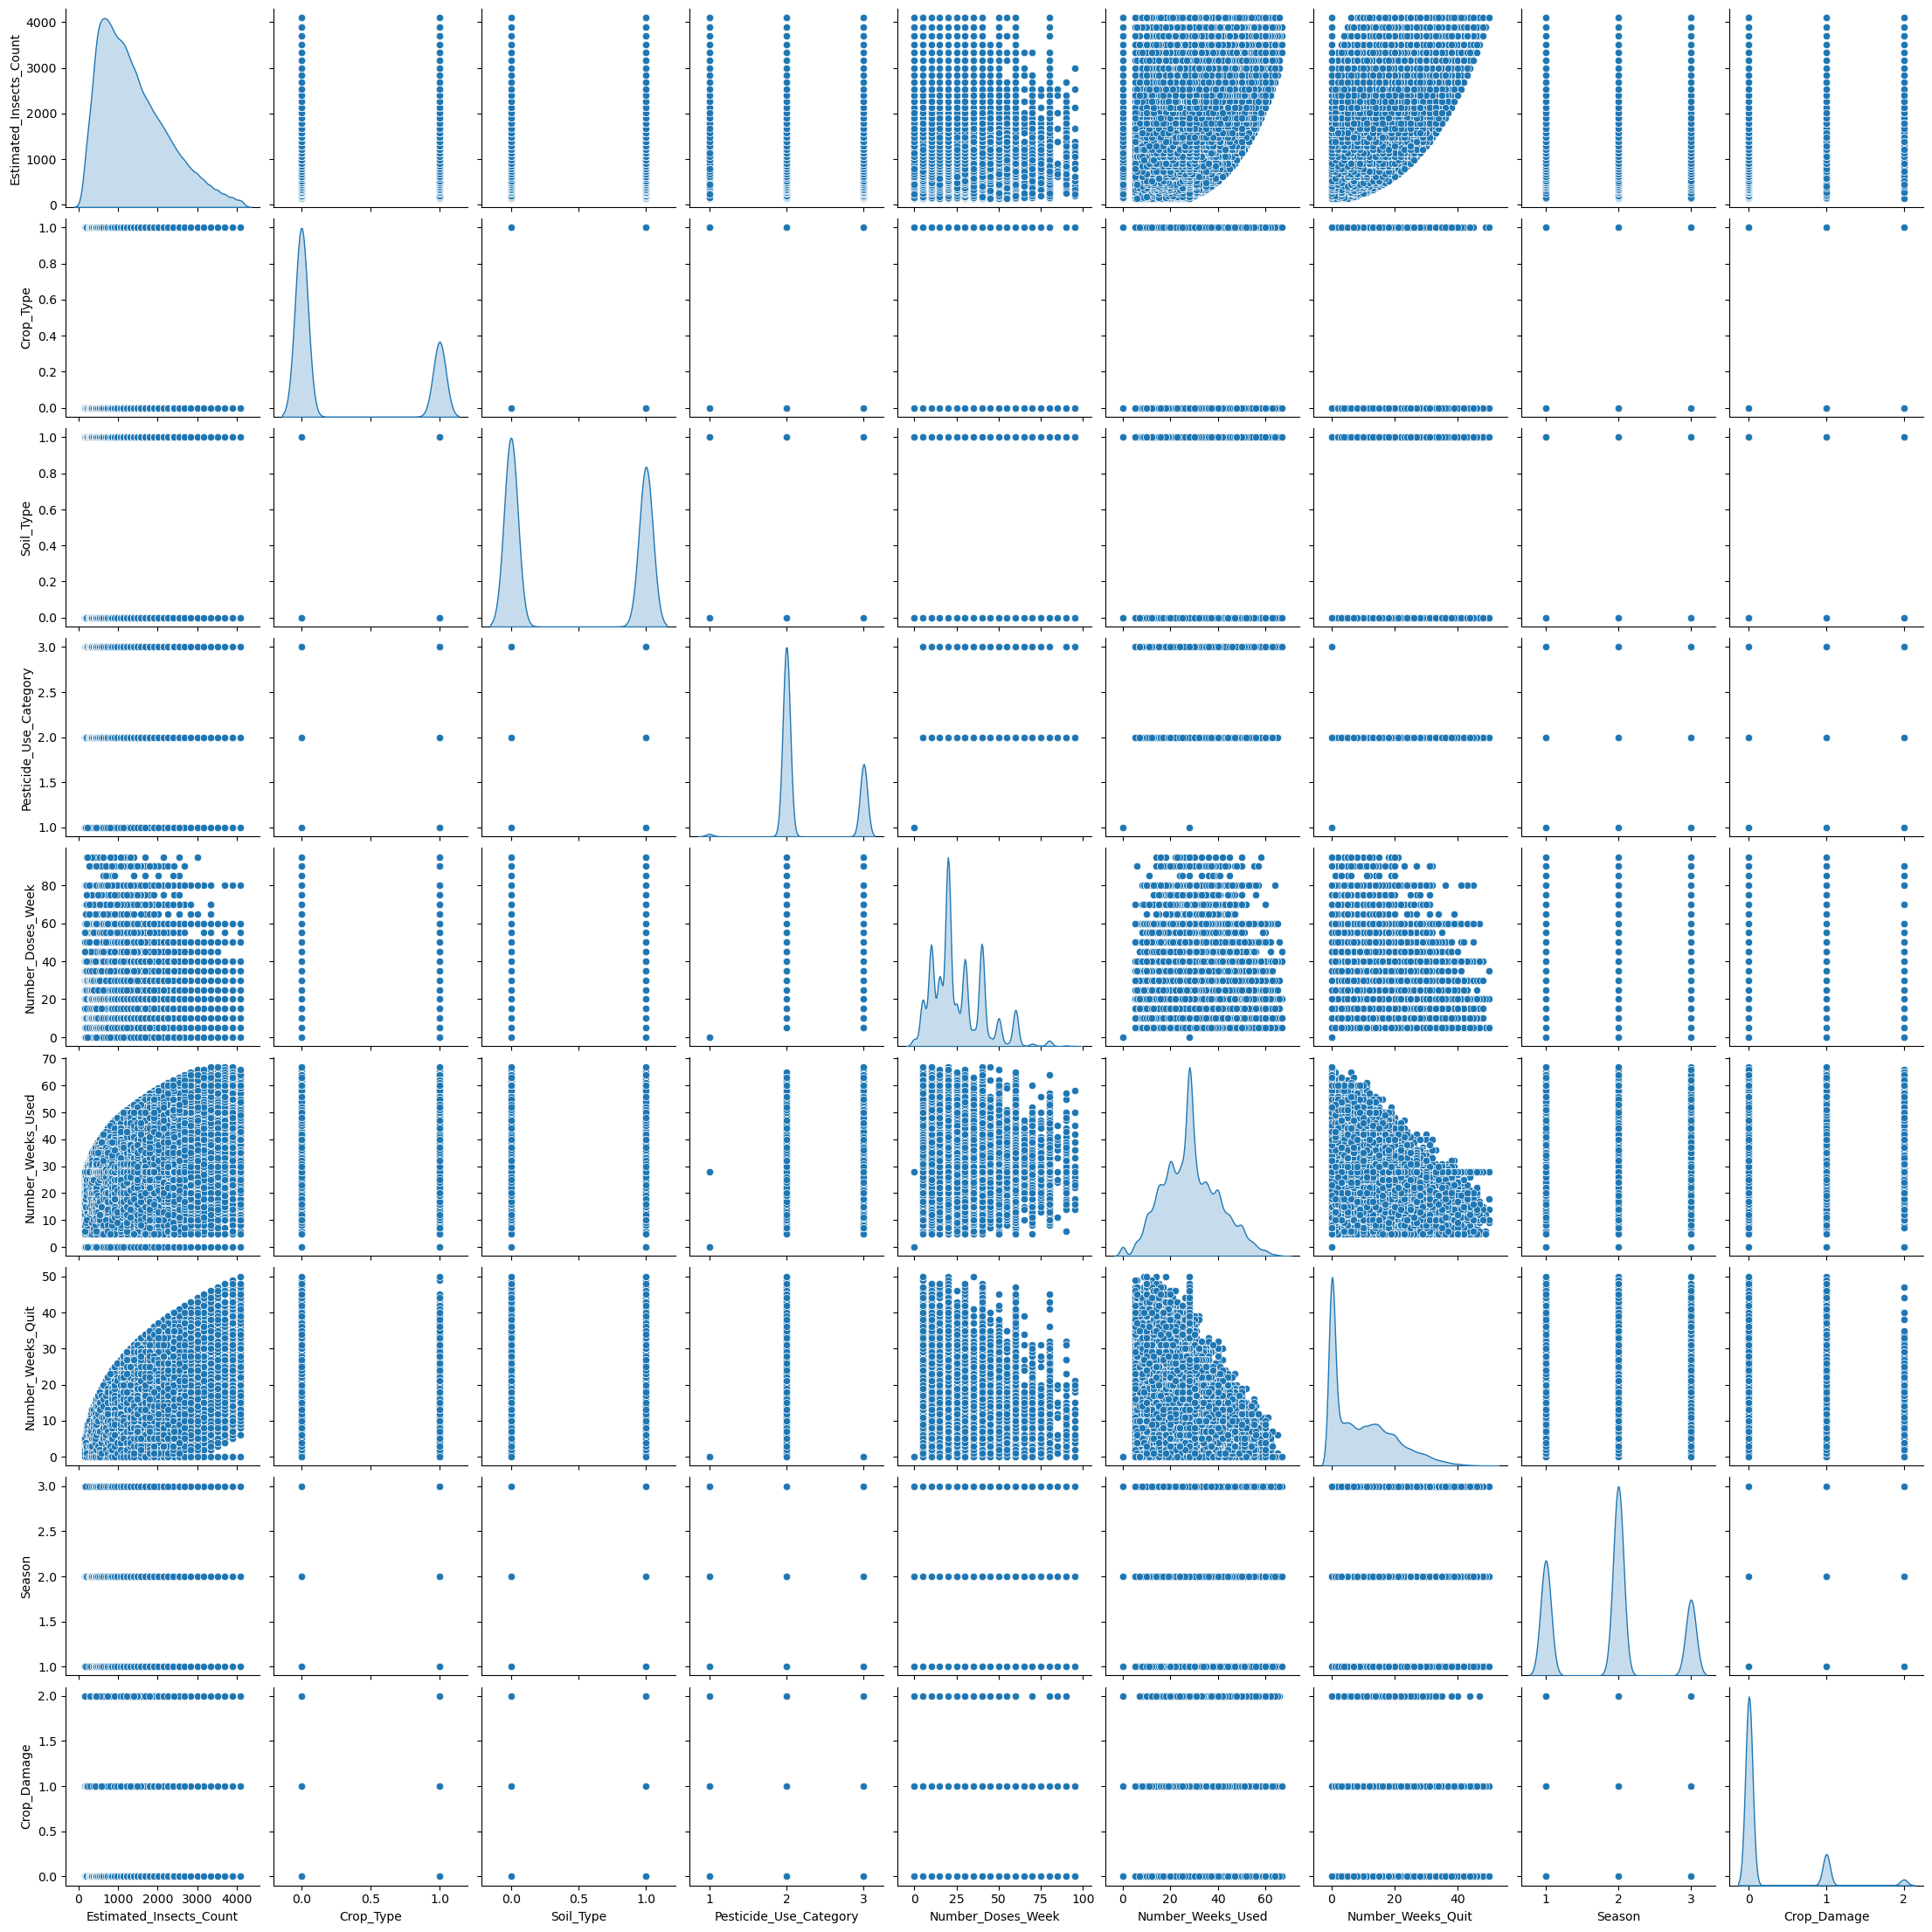

In [41]:
sns.pairplot(N,diag_kind="kde" )

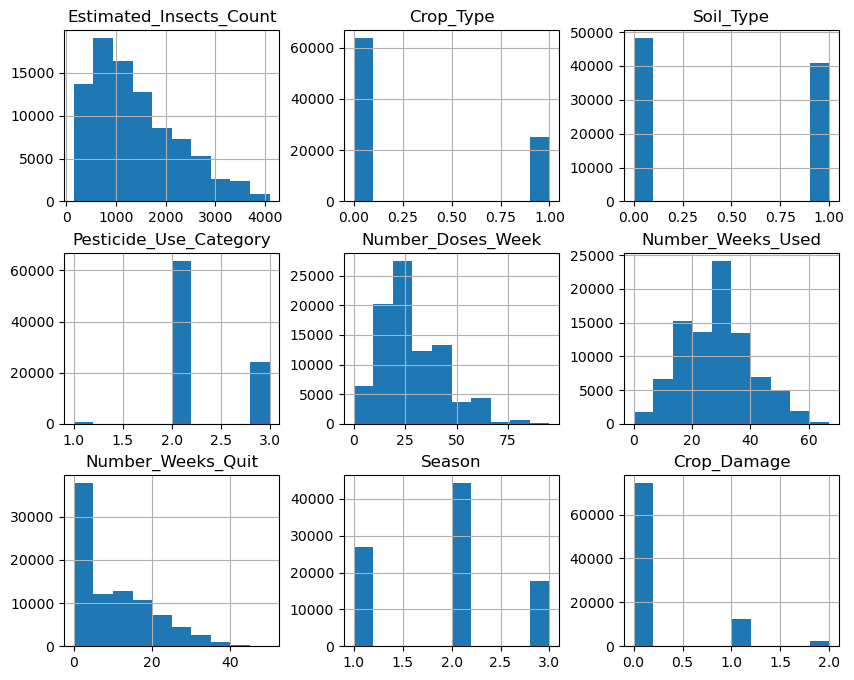

In [43]:
N.hist(figsize=(10,8))
plt.show()

In [45]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


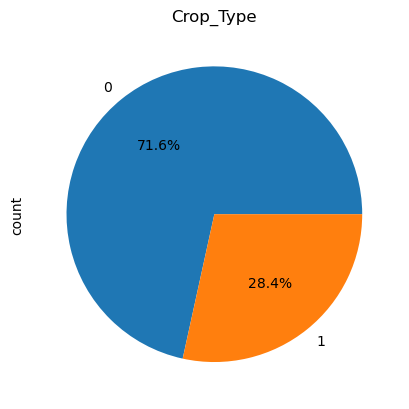

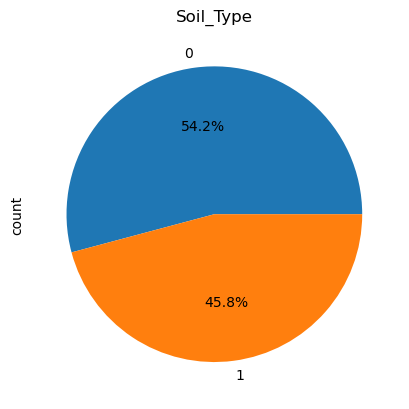

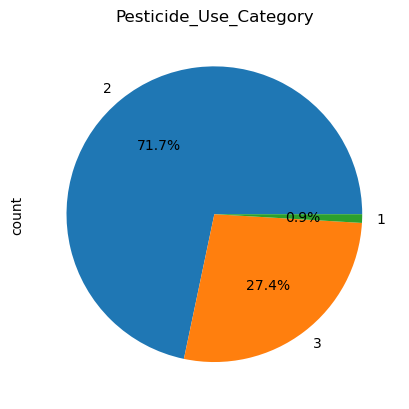

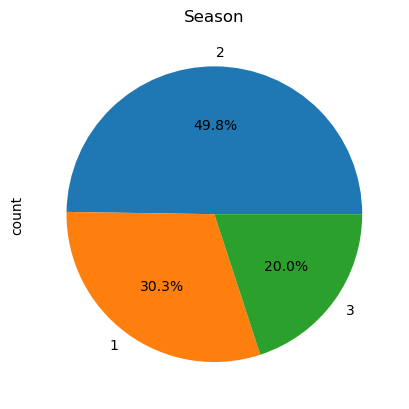

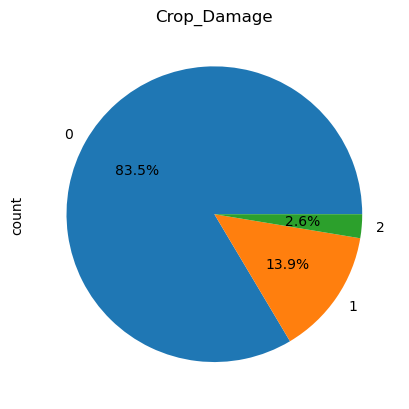

In [49]:
z=['Crop_Type','Soil_Type', 'Pesticide_Use_Category','Season','Crop_Damage']
for i in z:
    plt.title(i)
    train[i].value_counts().plot(kind='pie',autopct='%.1f%%')
    plt.show()


#### What percentage of Crop_damage in Crop_Type

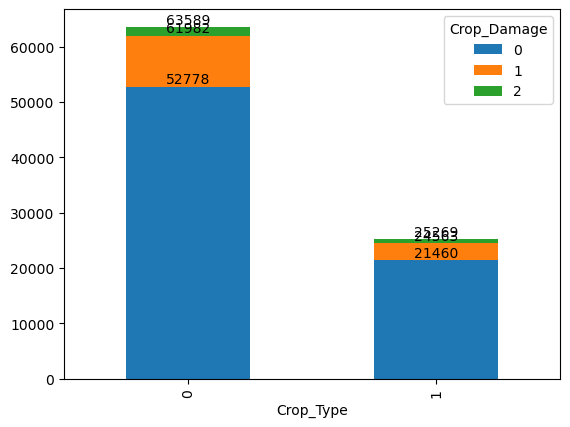

In [51]:
ax = pd.crosstab(train.Crop_Type,train.Crop_Damage).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

#### What percentage of Soil_Damge in Soil_Type

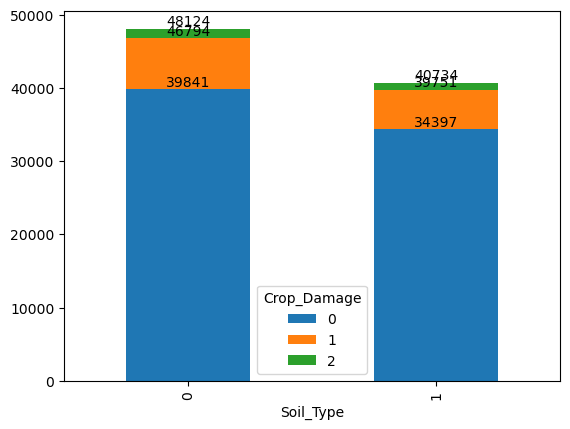

In [53]:
ax = pd.crosstab(train.Soil_Type,train.Crop_Damage).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

#### Which Pesticide Category used in diffrent Crop Type

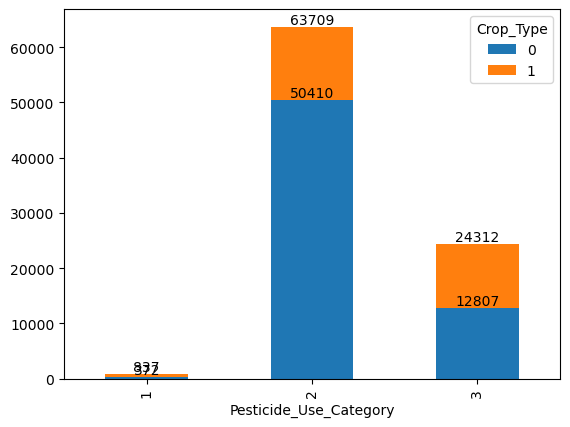

In [55]:
ax = pd.crosstab(train.Pesticide_Use_Category,train.Crop_Type).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

#### What percentage of diffrent type of Crop used in diffrent type of Soil

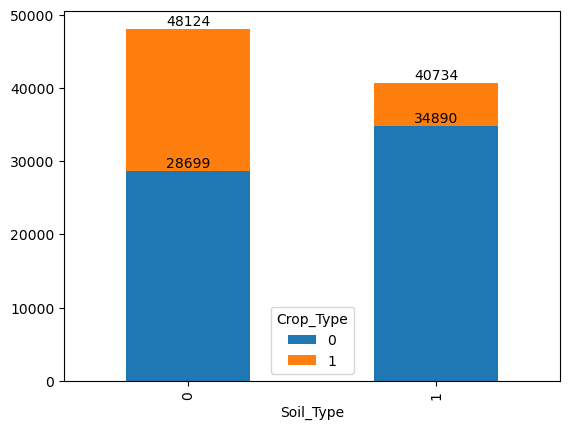

In [59]:
ax = pd.crosstab(train.Soil_Type,train.Crop_Type).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

#### Which Type of crop get more number of doses per week

<Figure size 2000x1000 with 0 Axes>

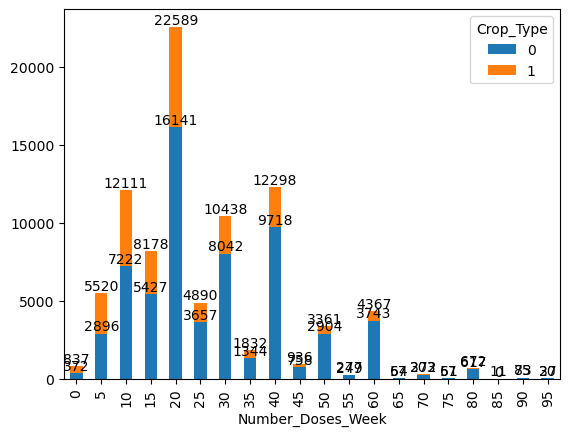

In [76]:
plt.figure(figsize=(20,10))
ax = pd.crosstab(train.Number_Doses_Week,train.Crop_Type).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)


#### Based on season how much crop damaged 

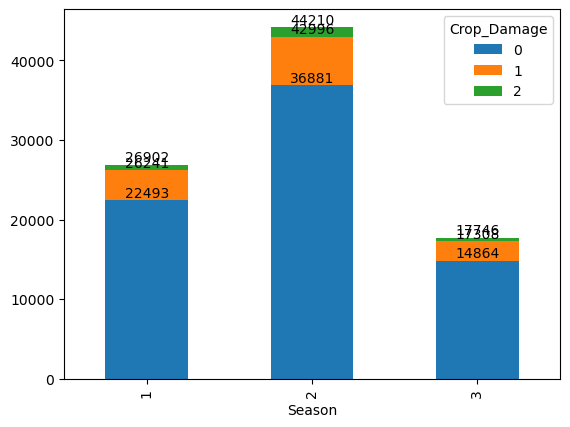

In [68]:
ax = pd.crosstab(train.Season,train.Crop_Damage).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

#### Which type of Crop damage and how

#### Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

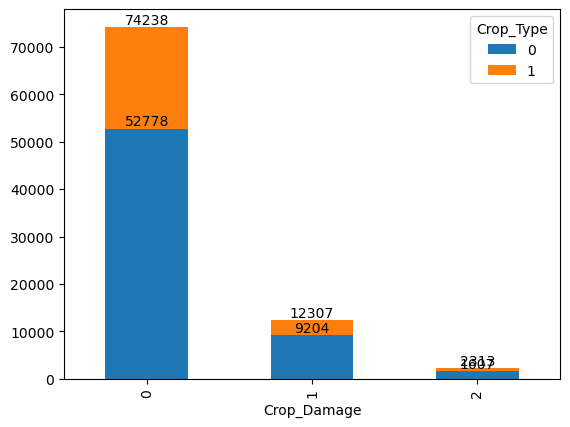

In [78]:
ax = pd.crosstab(train.Crop_Damage,train.Crop_Type).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

In [80]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [83]:
train["Number_Weeks_Used"] = train.Number_Weeks_Used.astype("int")

In [84]:
# Drop - ID
train.drop("ID",axis=1,inplace=True)

In [85]:
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0,0,1,0
1,209,1,0,1,0,0,0,2,1
2,257,1,0,1,0,0,0,2,1
3,257,1,1,1,0,0,0,2,1
4,342,1,0,1,0,0,0,2,1


# Splitting Data

In [87]:
X = train.drop("Crop_Damage",axis=1)
y = train["Crop_Damage"]
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0,0,1
1,209,1,0,1,0,0,0,2
2,257,1,0,1,0,0,0,2
3,257,1,1,1,0,0,0,2
4,342,1,0,1,0,0,0,2


In [88]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [111]:
print(X_train.shape,X_test.shape)

(71086, 8) (17772, 8)


In [112]:
print(y_train.shape,y_test.shape)

(71086,) (17772,)


# Cleaning the Test Data

In [89]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [90]:
test.drop("ID",axis=1,inplace=True)

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  59310 non-null  int64  
 1   Crop_Type                59310 non-null  int64  
 2   Soil_Type                59310 non-null  int64  
 3   Pesticide_Use_Category   59310 non-null  int64  
 4   Number_Doses_Week        59310 non-null  int64  
 5   Number_Weeks_Used        59310 non-null  float64
 6   Number_Weeks_Quit        59310 non-null  int64  
 7   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.6 MB


In [95]:
test["Number_Weeks_Used"] = test.Number_Weeks_Used.fillna(test.Number_Weeks_Used.median())

In [92]:
test.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [96]:
test["Number_Weeks_Used"] = test.Number_Weeks_Used.astype(int)

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  59310 non-null  int64
 1   Crop_Type                59310 non-null  int64
 2   Soil_Type                59310 non-null  int64
 3   Pesticide_Use_Category   59310 non-null  int64
 4   Number_Doses_Week        59310 non-null  int64
 5   Number_Weeks_Used        59310 non-null  int32
 6   Number_Weeks_Quit        59310 non-null  int64
 7   Season                   59310 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 3.4 MB


In [98]:
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28,0,2
1,410,1,1,1,0,0,0,2
2,626,1,0,1,0,0,0,2
3,731,1,0,1,0,0,0,2
4,789,0,0,1,0,0,0,1


# Model Building

### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X,y)
LR.score(X,y)

0.8356141259087533

In [108]:
from sklearn.metrics import classification_report

### Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X,y)
DT.score(X,y)

0.9790452182133291

### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X,y)
RF.score(X,y)

0.9789889486596592

In [128]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [129]:
dic = {"n_estimators":[100,500,1000],
       "criterion" :['gini',"Entropy"],
       "max_depth" : [8,10,12],
      }

##### Hyper parameter Tunnig

In [130]:
RF1 =RandomForestClassifier()

In [131]:
GS = GridSearchCV(RF1, param_grid=dic,cv=5)

In [132]:
GS.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': [8, 10, 12],
                         'n_estimators': [100, 500, 1000]})

In [133]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 100}

In [134]:
GS.best_score_

0.8426253068570508

In [135]:
logictest=LR.predict(test)

In [136]:
pd.DataFrame(logictest).to_csv('logisticRegression.csv')

In [138]:
Random=RF.predict(test)

In [139]:
pd.DataFrame(Random).to_csv('RandomForest.csv')

### Gradient Boosting

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier().fit(X,y)
GB.score(X,y)

0.8455738369083257

In [141]:
GB1 = GradientBoostingClassifier().fit(X_train,y_train)

In [142]:
GB1.score(X_test,y_test)

0.8440243079000675

### XG Boost

In [144]:
from xgboost import XGBClassifier
XG = XGBClassifier().fit(X_train,y_train)

In [145]:
XG.score(X_test,y_test)

0.8463875759621877

In [146]:
from lazypredict.Supervised import LazyClassifier

In [147]:
LC = LazyClassifier(verbose=0,custom_metric=None)
models,prediction = LC.fit(X_train,X_test,y_train,y_test)
print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [24:48<01:24, 84.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 71086, number of used features: 8
[LightGBM] [Info] Start training from score -0.179243
[LightGBM] [Info] Start training from score -1.980896
[LightGBM] [Info] Start training from score -3.643852


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [24:48<00:00, 51.34s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.60               0.52    None      0.67   
RandomForestClassifier             0.82               0.41    None      0.80   
BaggingClassifier                  0.81               0.40    None      0.79   
ExtraTreesClassifier               0.82               0.40    None      0.79   
KNeighborsClassifier               0.83               0.40    None      0.80   
ExtraTreeClassifier                0.76               0.40    None      0.76   
DecisionTreeClassifier             0.75               0.40    None      0.75   
XGBClassifier                      0.85               0.40    None      0.81   
LGBMClassifier                     0.85               0.39    None      0.81   
QuadraticDiscriminantAnalysis      0.82               0.39    None      0.79   
GaussianNB                         0.82 